# Reinforcement Learning: Multi-Agent Cooperative-Competitive Learning (Using DRL to learn Tennis)

---

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

<img src="img/tennis.png" alt="drawing" width="500"/>

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

### Solving the Environment

The task is episodic, and in order to solve the environment, your agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). Specifically,

- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.

- This yields a single score for each episode.
The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.

### Academic Sources

The following result is an implementation of a MA-DDPG (Multi Agent Deep Deterministic Policy Agent) inspired by OpenAI's paper titled [Multi-Agent Actor-Critic for Mixed.
Cooperative-Competitive Environments](https://papers.nips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf). I have some notes to summarize my takeaways:

- Traditional reinforcement learning approaches such as Q-Learning or policy gradient
are poorly suited to multi-agent environments. One issue is that each agent’s policy is changing
as training progresses, and the environment becomes non-stationary from the perspective of any
individual agent.

- **General Purpose Multi-Agent Learning Algorithm**:
 - (1) leads to learned policies that only use local information (i.e. their own observations) at execution time 
 - (2) does not assume a differentiable model of the environment dynamics or any particular structure on the communication method between agents
 - (3) is applicable not only to cooperative interaction but to competitive or mixed interaction involving both physical and communicative behavior.
 
- **Solution**: actor-critic policy gradient methods where the critic is
augmented with extra information about the policies of other agents, while the actor only has access to local information

- Agents can either be cooperative, competitive, or both and many
algorithms are designed only for a particular nature of interaction. 

- Each agent i aims to maximize its own total expected return.
- Markov Games, Q-Learning, DQN, Policy Gradient Algorithms all struggle for their own reasons

- **Multi-Agent Actor Critic**:
    - Constraints:
        - (1) the learned policies can only use local information (i.e. their own observations) at execution time
        - (2) we do not assume a differentiable model of the environment dynamics
        - (3) we do not assume any particular structure on the communication method between agents 
    - Gradient: 


<img src="img/gradient2.png" alt="drawing" align="center"  width="700"/> -

- Inferring Policies of Other Agents:
    
<img src="img/infering_policies.png" alt="drawing" align="center"  width="700"/> -



---

### Configuration

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

---
### Requirements

Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
#!pip install -r requirements.txt

### Imports 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from MADDPG import *
from utils import *

### Unity Environment

In [3]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
def examine_environment(env, brain):

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]

    # number of agents 
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:\n', states[0])

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Info 
states = env_info.vector_observations 
state_size = states.shape[1]
action_size = brain.vector_action_space_size, 
examine_environment(env, brain)
num_agents = len(env_info.agents)

maddpg = MADDPG(state_size, action_size[0], num_agents, seed=0)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like:
 [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.38993645 -1.5
 -0.          0.          6.83172083  5.99607611 -0.          0.        ]


In [7]:
def maddpg_train(agent,
                  env,
                  brain_name,
                  n_agents,
                  n_episodes=10000,
                  max_t=10000,
                  print_every=100,
                  win_condition=0.5):
    
    """
    
    Continious Control using DDPG.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): how many episodes before printing scores
        n_agents (int): how many arms are in the environment
    
    """    

    scores_deque = deque(maxlen=100)
    scores = []
    average_scores_list = []
    
    for i_episode in tqdm(range(1, n_episodes+1)):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations             # get the current state (for each agent)
        score = np.zeros(n_agents)                     # initialize the score (for each agent)
        
        for t in range(max_t):
            actions = agent.act(states)                   # consult agent for actions
            env_info = env.step(actions)[brain_name]      # take a step in the env
            next_states = env_info.vector_observations    # get next state (for each agent)
            rewards = env_info.rewards                    # get reward (for each agent)
            dones = env_info.local_done                   # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)  # take a learning step
            score += rewards                              # update the score (for each agent)
            states = next_states                          # roll over states to next time step
            if np.any(dones):                             # exit loop if episode finished
                break
        
        score_max = np.max(score)
        scores.append(score_max)
        scores_deque.append(score_max)
        average_score = np.mean(scores_deque)
        average_scores_list.append(average_score)
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)), end="")  

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage score: {:.3f}'.format(i_episode , average_score))
        
        # Winning condition + save model parameters    
        if average_score >= win_condition:
            print("\rSolved in episode: {} \tAverage score: {:.3f}".format(i_episode , average_score))
            break

    execution_info = {'last_score': scores.pop(),
                      'solved_in': i_episode,
                      'last_100_avg': average_score}
    
    return scores, scores_deque, execution_info 

In [8]:
 scores, scores_deque, execution_info = maddpg_train(maddpg, env, brain_name, num_agents)

Episode 16	Average Score: 0.006

C:\Users\ad55a\Documents\GitHub\Reinforcement-Learning-Collaboration-and-Competition\MADDPG.py:184: UserWarning: Using a target size (torch.Size([250, 2])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_loss = F.mse_loss(Q_expected, Q_targets)


Episode 100	Average score: 0.005
Episode 200	Average score: 0.007
Episode 300	Average score: 0.001
Episode 400	Average score: 0.030
Episode 500	Average score: 0.028
Episode 600	Average score: 0.053
Episode 700	Average score: 0.071
Episode 800	Average score: 0.095
Episode 900	Average score: 0.128
Episode 1000	Average score: 0.119
Episode 1100	Average score: 0.224
Episode 1200	Average score: 0.289
Episode 1300	Average score: 0.293
Episode 1400	Average score: 0.399
Solved in episode: 1454 	Average score: 0.506



In [10]:
for index, agent in enumerate(maddpg.DDPGs):
    torch.save(agent.actor.state_dict(), 'agent{}_checkpoint_actor.pth'.format(index+1))
    torch.save(agent.critic.state_dict(), 'agent{}_checkpoint_critic.pth'.format(index+1))

last_score: 1.5000000223517418
solved_in: 1454
last_100_avg: 0.5064000075682997


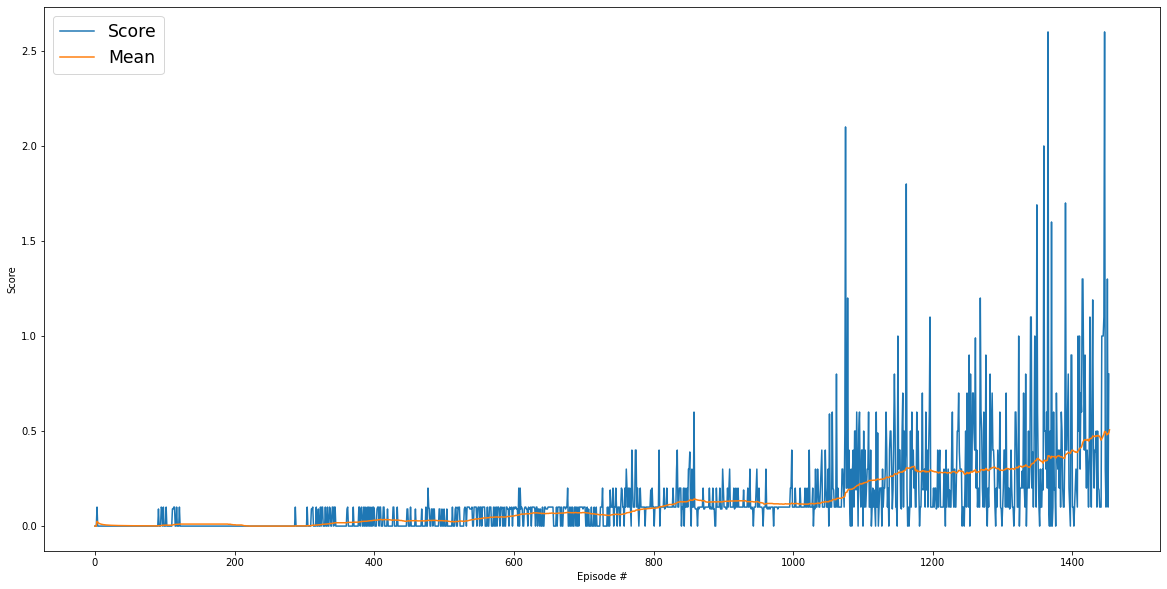

In [12]:
plot_scores(scores, scores_deque, execution_info)